In [1]:
#conda install -c conda-forge fbprophet  
#pip doesn't work
#data source: https://fred.stlouisfed.org/series/INDPRO#0
#Industrial production index, or INDPRO (more details) as a 
#percentage of the 2012 industrial production index. So 120 would be 120% of the 2012 industrial production index.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [16]:
df = pd.read_csv('./datasets/candy_production.csv')
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [21]:
#rename date column ds, value column y per Prohet specs
df.rename(columns={'observation_date': 'ds'}, inplace=True)
df.rename(columns={'IPG3113N': 'y'}, inplace=True)
#ensure our ds value is truly datetime
df['ds'] = pd.to_datetime(df['ds'])
#filtering here on >=1995, just to pull the last ~20 years of production information
start_date = '01-01-1995'
mask = (df['ds'] > start_date)
df = df.loc[mask]

,ds,y
277,1995-02-01,99.2227
278,1995-03-01,96.1946
279,1995-04-01,94.2656
280,1995-05-01,93.5966
281,1995-06-01,98.2886


In [22]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
# Python
future = m.make_future_dataframe(periods=730)
future.tail()

,ds
996,2019-07-28
997,2019-07-29
998,2019-07-30
999,2019-07-31
1000,2019-08-01


In [24]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
996,2019-07-28,117.796140,111.591576,123.519210
997,2019-07-29,117.016641,110.999394,122.908126
998,2019-07-30,116.001765,109.887603,122.016393
999,2019-07-31,114.757009,108.375085,121.465374
1000,2019-08-01,113.293294,107.234872,119.295134


In [25]:
fig1 = m.plot(forecast)

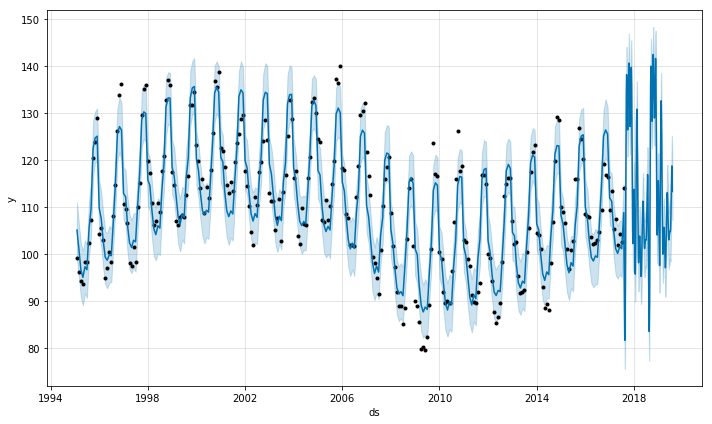

In [26]:
fig1

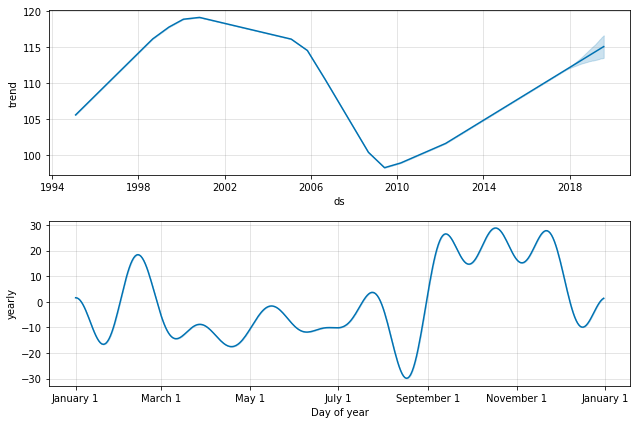

In [27]:
fig2 = m.plot_components(forecast)
fig2